# First Kaggle challenge - Titanic

## Machine Learning from Disaster

- v0.1_112020
- *uthor: marcusRB*
- [Kaggle - Titanic challenge](https://www.kaggle.com/c/titanic/)

***

### 1. The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### What Data Will I Use in This Competition?
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.
1. [X] Question or problem definition.
2. [ ] Acquire training and testing data.
3. [ ] Wrangle, prepare, cleanse the data.
4. [ ] Analyze, identify patterns, and explore the data.
5. [ ] Model, predict and solve the problem.
6. [ ] Visualize, report, and present the problem solving steps and final solution.
7. [ ] Supply or submit the results.

* * *
## 2a. Check the versions of libraries

In [67]:
# Check the versions of libraries MacOS

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:43:08) [MSC v.1926 32 bit (Intel)]
scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


In [68]:
# Import new packages
!pip install xlrd

You should consider upgrading via the 'c:\users\jd\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


## Import libraries

In [69]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
#from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn import preprocessing
# Wrangle missing value
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

***
## Load dataset

Kaggle provee dos datasets: `train` y `test`.

#### En el caso de realizar la conexión con la API de Kaggle 

Instalar la librería kaggle

```
!pip install kaggle
```
Sucesivamente damos permisos a la carpeta del json 

```
!chmod 600 /home/*vuestro_username*/.kaggle/kaggle.json
```

Una vez habilitados los permisos a la carpeta `.kaggle` lanzamos esta linea de comando API

```
!kaggle competitions download -c titanic
```

In [70]:
#!pip install kaggle
#!chmod 600 /home/jovyan/.kaggle/kaggle.json

In [71]:
#!kaggle competitions download -c titanic

Necesitamos ahora descomprimir el fichero.zip

```
!unzip -o titanic.zip
```

In [72]:
#!unzip -o titanic.zip

***

In [73]:
## Load dataset
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

# Necesitamos separar los ids de los pasajeros para utilizarlos al final del modelo de submit
ids = test_dataset['PassengerId']

In [74]:
train_dataset.head(10)
test_dataset.head(10)
ids.head(10)

0    892
1    893
2    894
3    895
4    896
5    897
6    898
7    899
8    900
9    901
Name: PassengerId, dtype: int64

In [75]:
# Unificamos los dos dataset para poder procesarlos conjuntamente
titanic_list = pd.concat(objs=[train_dataset, test_dataset],
                         axis=0).reset_index(drop=True)
titanic_list

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [76]:
# Comprobamos la forma de nuestro dataset
train_dataset.shape, test_dataset.shape

((891, 12), (418, 11))

In [77]:
titanic_list.shape

(1309, 12)

In [78]:
titanic_list.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [79]:
titanic_list.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1300,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


***

## Data description

Nuestro conjunto de datos tiene 12 columnas o varables, de las cuales 3 (Age, Cabin y Embarked) tienen valores no disponibles. La variable que queremos predecir es Survived, que nos indica si el pasajero sobrevivió a la tragedia del Titanic.

In [80]:
# Check dataframe structure
titanic_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


In [81]:
# Describimos nuestro dataset
titanic_list.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


***
## EDA, Visualization and transformation data

realizamos el check de cada atributo, buscamos valores atípicos, nulos, errores y eventualmente creamos nuevos atributos.

In [82]:
# Check null y NA para ambos dataset
titanic_list.isna()

# el resultado será una tabla con valores booleanos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,True,False,False,False,False,True,False
1305,False,True,False,False,False,False,False,False,False,False,False,False
1306,False,True,False,False,False,False,False,False,False,False,True,False
1307,False,True,False,False,False,True,False,False,False,False,True,False


In [83]:
# Necesitaré agruparlos y sumarlos
titanic_list.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [84]:
# Buscamos la frecuencia relativa
titanic_list.isnull().sum()/len(titanic_list)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

Deberíamos realizar un trabajo de manipulación de los datos nulos para `Age`, `Embarked`, `Fare`. Para la variable `Cabin`podemos eliminarla o tratarla.

*** 
### `PassengerId`

realizamos el check del atributo PassengerId

In [85]:
titanic_list['PassengerId'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

No va aportar ningun valor a nuestro modelo, por lo tanto eliminaremos este atributo

In [86]:
titanic_list_bak = titanic_list

In [87]:
# Guardamos copia
titanic_list_bak

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [88]:
# Eliminamos el PassengerId del dataset
titanic_list.drop(['PassengerId'],
                  axis=1,
                  inplace=True)

In [89]:
# Check dataset
titanic_list

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


***

## `Survived`

Nuestra variable predictora o dependiente, verificamos las correctas etiquetas `0` y `1` , aprox 38%

In [90]:
len(train_dataset)

891

In [91]:
len(test_dataset)

418

<AxesSubplot:xlabel='Survived'>

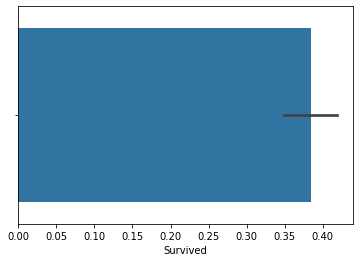

In [92]:
titanic_list['Survived'][:891] = titanic_list['Survived'][:891].astype(int)
sns.barplot(x = "Survived",
            data = titanic_list)

In [93]:
titanic_list.describe()['Survived']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

***
## `Pclass`

Check ticket class. Es una variable categórica con 3 valores

In [94]:
titanic_list[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

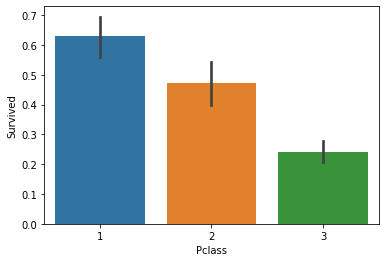

In [95]:
sns.barplot(x = 'Pclass',
           y = 'Survived',
           data = titanic_list)

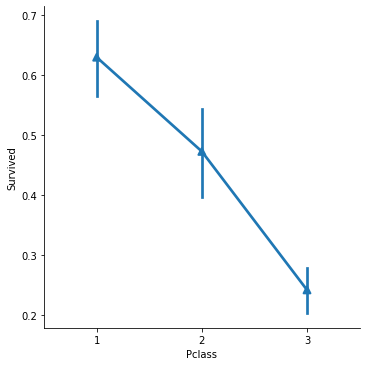

In [96]:
sns.catplot(x="Pclass", y="Survived", hue=None,
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic_list)

## `Sex`

In [97]:
# Representamos gráficamente el atributo Sex
print(titanic_list['Sex'].value_counts(sort = False))

female    466
male      843
Name: Sex, dtype: int64


In [98]:
print(titanic_list['Sex'].value_counts(sort = False, normalize = True))

female    0.355997
male      0.644003
Name: Sex, dtype: float64


Text(0.5, 1.0, 'Survive v/s Sex')

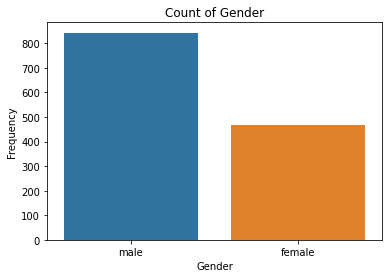

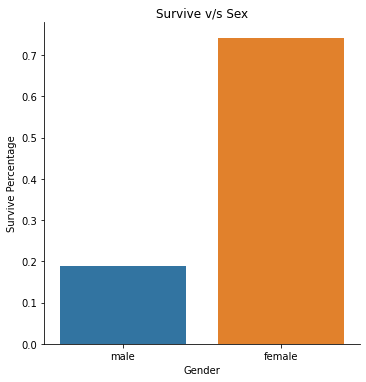

In [99]:
# Visualising counts of Gender with bar graph
sns.countplot(x="Sex", data=titanic_list);
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Count of Gender')

# Showing proportion of survival for different type of gender
sns.catplot(x="Sex", y="Survived", data=titanic_list, kind="bar", ci=None)
plt.xlabel('Gender')
plt.ylabel('Survive Percentage')
plt.title('Survive v/s Sex')

In [100]:
# Procedemos a la binarización de la variable Sex en 0 y 1
titanic_list_bak = titanic_list # guardamos copia

In [101]:
titanic_list['Sex'] = titanic_list['Sex'].map({
    'female' : 1,
    'male': 0
})
titanic_list['Sex']

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Sex, Length: 1309, dtype: int64

In [102]:
# Check Sex features
titanic_list['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

## `SibSp`

In [103]:
titanic_list[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


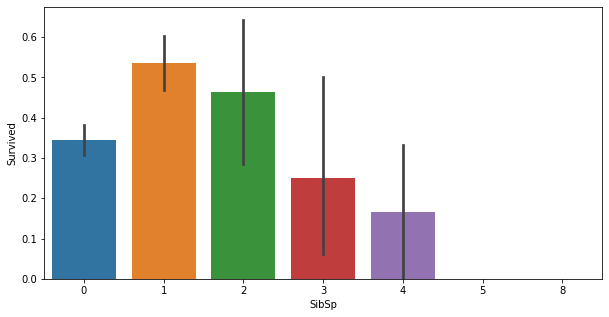

In [104]:
plt.figure(figsize= [10.0, 5.0])
sns.barplot(x="SibSp", y="Survived", data=titanic_list)
plt.show()

## `Parch`

In [105]:
titanic_list[['Parch','Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000
7,9,NaN


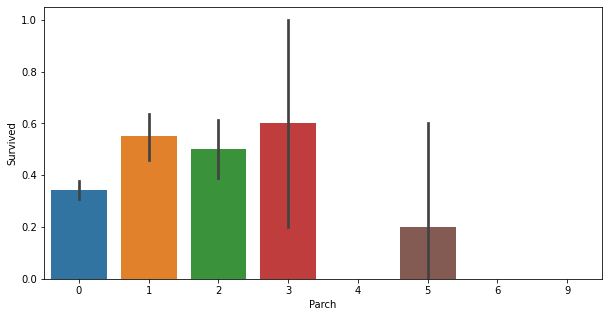

In [106]:
plt.figure(figsize= [10.0, 5.0])
sns.barplot(x="Parch", y="Survived", data=titanic_list)
plt.show()

## `Ticket`

Ticket number no aporta información

In [107]:
titanic_list['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [108]:
# Eliminamos la columna Ticket
titanic_list.drop(['Ticket'],
                 axis = 1,
                 inplace = True)

In [109]:
titanic_list.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S
5,0.0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,NaN,Q
6,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,E46,S
7,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,NaN,S
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11.1333,NaN,S
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,NaN,C


***

## `Embarked`
Tenemos 3 valores: `C` for Cherbourg, `Q` for Queenstown, `S` for Southampton.

In [110]:
titanic_list[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [111]:
# Tenemos que tratar los valores nulos. Un método es con el most_frequent
freq_port = titanic_list.Embarked.dropna().mode()[0]
freq_port

'S'

In [112]:
# Asignamos el valor frecuente
titanic_list['Embarked'] = titanic_list['Embarked'].fillna(freq_port)

In [113]:
# Raelizamos el check de su distribución
titanic_list['Embarked'].describe()

count     1309
unique       3
top          S
freq       916
Name: Embarked, dtype: object

In [114]:
# Visualizamos la variable Embarked
titanic_list[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


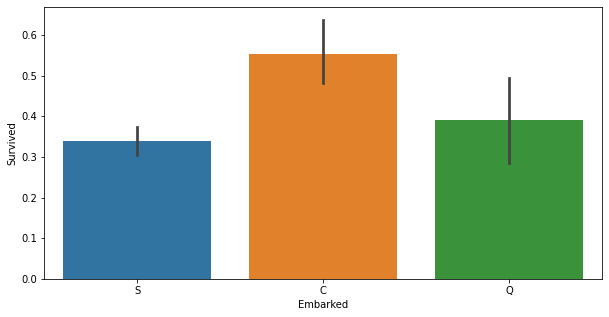

In [115]:
plt.figure(figsize= [10.0, 5.0])
sns.barplot(x="Embarked", y="Survived", data=titanic_list)
plt.show()

***
## `Fare Pendiente DE REALIZAR

buscamos la distribución de la variable continua

In [116]:
titanic_list['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

In [117]:
titanic_list['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [118]:
titanic_list['Fare'].isna().sum()

1

In [119]:
# Tratamos los valorse nulos 
# Doing same steps before for the second dataset
s = titanic_list['Fare'].value_counts(normalize=True)
missing = titanic_list['Fare'].isnull()
titanic_list.loc[missing,'Fare'] = np.random.choice(s.index, size=len(titanic_list[missing]),
                                                      p=s.values).astype(int)
titanic_list['Fare']

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

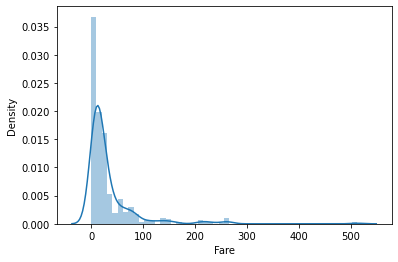

In [120]:
sns.distplot(titanic_list['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

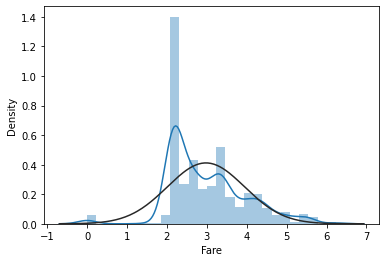

In [121]:
# Para poder normalizar los valores
titanic_list['Fare'] = np.log1p(titanic_list['Fare'])
sns.distplot(titanic_list['Fare'] , fit = norm)

# `Cabin`

B94     1
C31     2
C125    2
B37     1
B38     1
       ..
B11     1
D11     1
C45     1
E8      2
D50     1
Name: Cabin, Length: 186, dtype: int64
B94     0.00339
C31     0.00678
C125    0.00678
B37     0.00339
B38     0.00339
         ...   
B11     0.00339
D11     0.00339
C45     0.00339
E8      0.00678
D50     0.00339
Name: Cabin, Length: 186, dtype: float64


Text(0.5, 1.0, 'Survive v/s Cabin')

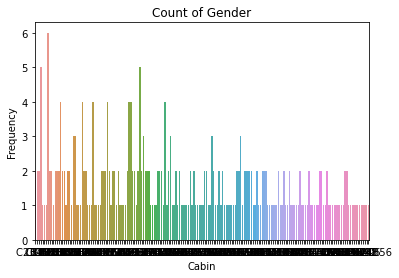

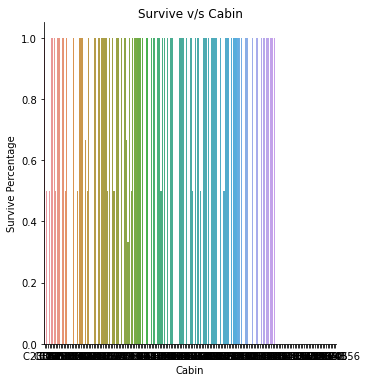

In [122]:
# Printing counts and percentage of male and female
print(titanic_list['Cabin'].value_counts(sort=False))
print(titanic_list['Cabin'].value_counts(sort=False,normalize=True))
# Making variable  categorical 
#sub['SEX'] = sub['SEX'].astype('category')
# Visualising counts of Gender with bar graph
sns.countplot(x="Cabin", data=titanic_list);
plt.xlabel('Cabin')
plt.ylabel('Frequency')
plt.title('Count of Gender')
# Showing proportion of survival for different type of gender
sns.catplot(x="Cabin", y="Survived", data=titanic_list, kind="bar", ci=None)
plt.xlabel('Cabin')
plt.ylabel('Survive Percentage')
plt.title('Survive v/s Cabin')

## Por el momento dejamos la variable `Cabin`

## 'Name'
### Variable categórica tenemos. 'Mr.', 'Miss' o 'Master'

In [123]:
# check
titanic_list['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [124]:
import re
help(re)

Help on module re:

NAME
    re - Support for regular expressions (RE).

MODULE REFERENCE
    https://docs.python.org/3.8/library/re
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides regular expression matching operations similar to
    those found in Perl.  It supports both 8-bit and Unicode strings; both
    the pattern and the strings being processed can contain null bytes and
    characters outside the US ASCII range.
    
    Regular expressions can contain both special and ordinary characters.
    Most ordinary characters, like "A", "a", or "0", are the simplest
    regular expressions; they simply match themselves.  You can
    concatenate ordinary characters, so last mat

### creamos una función para la extracción del título que se encuentra con el siguiente patrón.
```

string, ESPACE Título punto SPACE
```


In [125]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [126]:
# Aplicamos esta función a una nueva columna del dataset
titanic_list['TitleName'] = titanic_list['Name'].apply(get_title)

In [127]:
titanic_list['TitleName'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: TitleName, dtype: object

In [128]:
# check
pd.crosstab(titanic_list['TitleName'],titanic_list['Sex'])

Sex,0,1
TitleName,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [130]:
##Convertimos a variable categorica
ListaTitle = titanic_list['TitleName'].value_counts(ascending = True)
ListaTitle= ListaTitle[0:-4]
ListaTitle = ListaTitle.index
#istaTitle

In [131]:
## Convertimos a variable categorica
ListaTitle = titanic_list['TitleName'].value_counts(ascending = True) ## Listado de variables ordenadas
ListaTitle= ListaTitle[0:-4] # Retiramos todas menos las 4 mas importantes
ListaTitle = ListaTitle.index # Seleccionamos los indices
titanic_list['TitleName'] = titanic_list['TitleName'].replace(ListaTitle,'Rare') ##reemplazamos las categorias por `Rare`

<AxesSubplot:xlabel='TitleName', ylabel='Survived'>

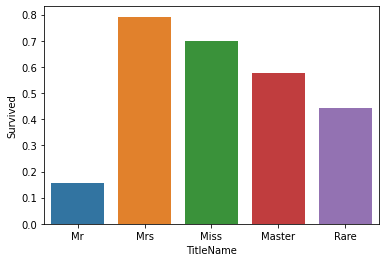

In [278]:
sns.barplot(x="TitleName", y="Survived", data=titanic_list, estimator = np.mean, ci=0)

In [132]:
# check
pd.crosstab(titanic_list['TitleName'],titanic_list['Sex'])

Sex,0,1
TitleName,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Rare,25,9


# `Age`

In [140]:
bins = [-1,0,5,12,18,24,35,50,65,np.inf]
labels = ['Unknown','Baby','Child','Teenager','Student','Young Adults','Adult','Mid-Senior','Senior']

In [141]:
# Imputamos los valores nulos con -0.5
titanic_list['Age'] = titanic_list['Age'].fillna(-0.5)

In [142]:
titanic_list[titanic_list['Age'].isna()]['Age'].unique

<bound method Series.unique of Series([], Name: Age, dtype: float64)>

In [143]:
titanic_list['AgeGroup'] = pd.cut(titanic_list['Age'], bins, labels = labels)

In [145]:
titanic_list['AgeGroup'].unique()

['Student', 'Adult', 'Young Adults', 'Unknown', 'Mid-Senior', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (9, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' ... 'Young Adults' < 'Adult' < 'Mid-Senior' < 'Senior']

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

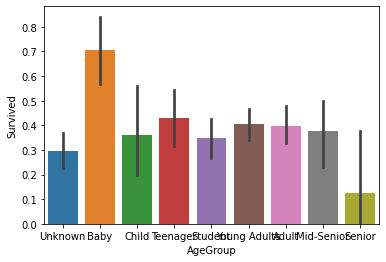

In [153]:
sns.barplot(data= titanic_list, x='AgeGroup', y ='Survived')

*** 

### Features Engineering

creación de nuevos atributos, o extracción de nuevos atributos.

# FamilySize 

### Suma de `SibSp` y `Parch`

In [161]:
# creamos un nuevo atributo
titanic_list['FamilySize'] = titanic_list['SibSp'] + titanic_list['Parch']

In [162]:
# Creamos un nuevo atributo FamilySize
titanic_list[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean()

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

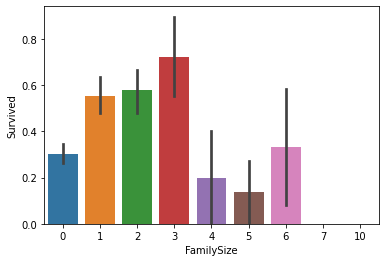

In [180]:
sns.barplot(x='FamilySize', y='Survived', data = titanic_list)

In [175]:
titanic_list.drop('FamiliSize',axis =1)
titanic_list.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'TitleName', 'AgeGroup', 'FamiliSize',
       'FamilySize'],
      dtype='object')

In [181]:
len(titanic_list)

1309

***

## 'IsAlone'

### creamos una nueva dimensión del pasajero que viaja solo

In [208]:
titanic_list['IsAlone'] = 0
titanic_list.loc[titanic_list['FamilySize']==1,'IsAlone'] = 1

In [209]:
titanic_list['IsAlone'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='IsAlone', ylabel='Survived'>

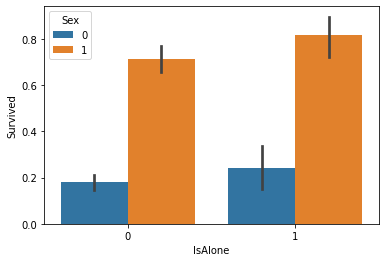

In [210]:
sns.barplot(x='IsAlone', y='Survived', data = titanic_list, hue ='Sex')

In [203]:
titanic_list['IsAlone'].unique()

array([1, 'Esta Solito'], dtype=object)

# `FareGroup`

Creamos grupos de tarifas

In [221]:
labels = ['Basic','Bronze','Silver','Gold']
titanic_list['FareGroup'] = pd.qcut(titanic_list['Fare'],q=4,labels=labels)

In [223]:
titanic_list[['FareGroup','Survived']].groupby(['FareGroup'], as_index = False).mean()

,FareGroup,Survived
0,Basic,0.197309
1,Bronze,0.303571
2,Silver,0.441048
3,Gold,0.600000


<AxesSubplot:xlabel='FareGroup', ylabel='Survived'>

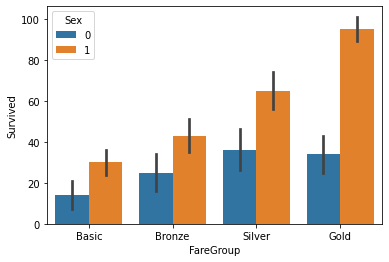

In [225]:
sns.barplot(x='FareGroup', y='Survived', data = titanic_list, hue ='Sex', estimator=np.sum)

In [232]:
pandas.pivot_table(data=titanic_list,values='Survived',columns= ['Sex'],index=['FareGroup'])

Sex,0,1
FareGroup,,
Basic,0.077778,0.697674
Bronze,0.159236,0.641791
Silver,0.274809,0.663265
Gold,0.311927,0.896226


# `InCabin`

Creamos una nueva dimensión InCabin que nos indica si el pasajero estuvo o no en la cabina

In [237]:
# Creamos la nueva dimensión excluyendo el resto de pasajeros con valores nulos. !Ojo¡ son el 78%
titanic_list['InCabin'] = ~titanic_list['Cabin'].isnull()

In [238]:
titanic_list['InCabin']

0       False
1        True
2       False
3        True
4       False
        ...  
1304    False
1305     True
1306    False
1307    False
1308    False
Name: InCabin, Length: 1309, dtype: bool

<AxesSubplot:xlabel='InCabin', ylabel='Survived'>

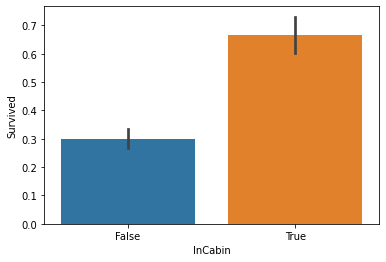

In [239]:
sns.barplot( data = titanic_list, x='InCabin', y ='Survived')

***

### `Fare per person`

In [249]:
titanic_list['Fare_per_Person'] = titanic_list['Fare'] / (titanic_list['FamilySize']+1)

In [250]:
titanic_list['Fare_per_Person'].describe()

count    1309.000000
mean        2.095685
std         0.986345
min         0.000000
25%         1.403193
50%         2.169054
75%         2.442347
max         6.240917
Name: Fare_per_Person, dtype: float64

<AxesSubplot:xlabel='FareGroup', ylabel='Fare_per_Person'>

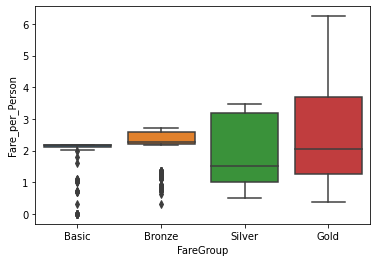

In [265]:
sns.boxplot(data=titanic_list, x= 'FareGroup', y = 'Fare_per_Person')

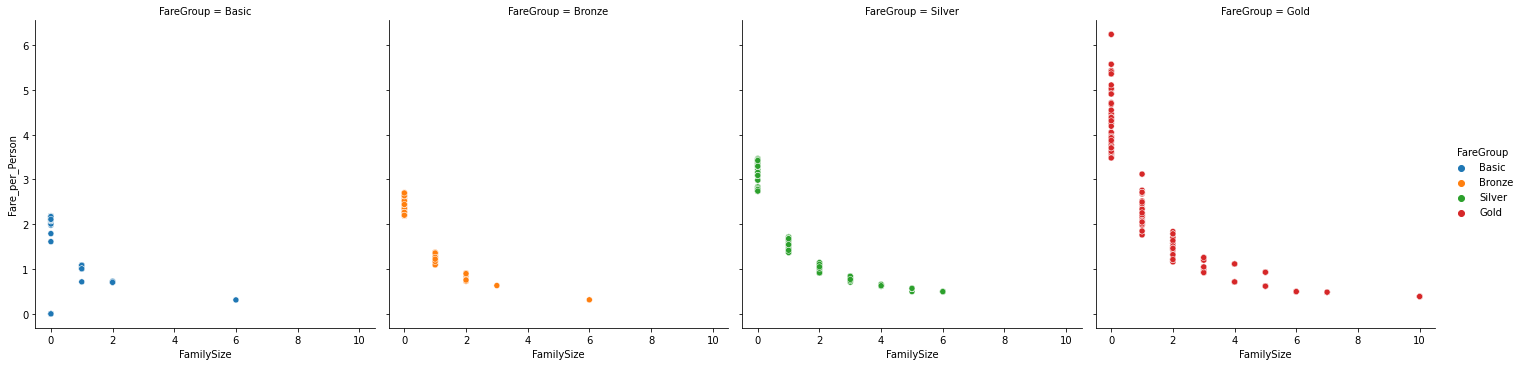

In [277]:
sns.relplot(data=titanic_list, x= 'FamilySize', y = 'Fare_per_Person',hue='FareGroup',col='FareGroup',kind='scatter')

In [251]:
titanic_list.column

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'TitleName', 'AgeGroup', 'FamilySize', 'IsAlone',
       'FareGroup', 'InCabin', 'Fare_per_Person'],
      dtype='object')

# Save 1s stage EDA

In [255]:
titanic_list.to_csv('titanic_list.csv', index = False)